<a href="https://colab.research.google.com/github/ValentineKarimi/Supervised-and-Unsupervised-R-Kira-Plastinina-and-online-course/blob/main/Modelling_OnlineCryptographyCourse_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Online cryptography course advertising** 

**a) Specifying the Data Analytic Question**


> As a Data Science Consultant, I have been employed by an online cryptography course entrepreneur to help her identify which individuals are most likely to click on her ads.



**b) Defining the Metric for Success**


* Identifying  which individuals are most likely to click on her ads

**c) Understanding the context**


> A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. She would like to identify which individuals are most likely to click on her ads. 


**d) Recording the Experimental Design**

* Reading the Data
* Tidying the Dataset
* Exploratory Analysis
* Implementing the Solution
* Challenging the solution
* Follow-up questions

**e) Data Relevance**

> All the variables given are relevant to the entrepreneur and will help know more  the how the online course advertisement was recieved



#**Reading and checking the data** 

In [ ]:
# dowloading tidyverse packages and library 
install.packages('tidyverse')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
#Read the dataset 
advert <- read_csv("advertising.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




In [ ]:
#Checking the head and tail of the data 

head(advert)
tail(advert)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [ ]:
# Lists variables in the dataset
names(advert) 

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [ ]:
# Seeing the structure of the dataset
str(advert) 

tibble [1,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Daily Time Spent on Site: num [1:1000] 69 80.2 69.5 74.2 68.4 ...
 $ Age                     : num [1:1000] 35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num [1:1000] 61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num [1:1000] 256 194 236 246 226 ...
 $ Ad Topic Line           : chr [1:1000] "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr [1:1000] "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : num [1:1000] 0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr [1:1000] "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct[1:1000], format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : num [1:1000] 0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   `

In [ ]:
#The rows and columns in the data 
cat("The dataset has ", dim(advert)[1], "rows and ", dim(advert)[2], " columns")

The dataset has  1000 rows and  10  columns

In [ ]:
#checking the datatypes on the columns 
sapply(advert, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "numeric"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Male
[1] "numeric"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "numeric"

In [ ]:
#summary of the dataset 
#Basic descriptive statistics and frequencies.

summary(advert) 

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [ ]:
class(advert) #Structure of the columns  

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

# **Tidying the dataset**

In [ ]:
## Importing packages for plotting 

library(tidyr)
library(ggplot2)
library(dplyr)

In [ ]:
names(advert)<- tolower(names(advert)) # make the column names to lowercase 


In [ ]:
names(advert)<- str_replace_all(names(advert), c(" " = "_")) # Replacing the white spaces in the column names 

head(advert)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:

# Creating a Subset  
df <-subset(advert, select = -c(	city,male,	country,ad_topic_line, timestamp)) # selects Age	,Area.Income	,Daily.Internet.Usage,	Clicked.on.Ad
print("Modified Data Frame")  
head(df)


[1] "Modified Data Frame"


daily_time_spent_on_site,age,area_income,daily_internet_usage,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68.95,35,61833.90,256.09,0
80.23,31,68441.85,193.77,0
69.47,26,59785.94,236.50,0
74.15,29,54806.18,245.89,0
68.37,35,73889.99,225.58,0
59.99,23,59761.56,226.74,0


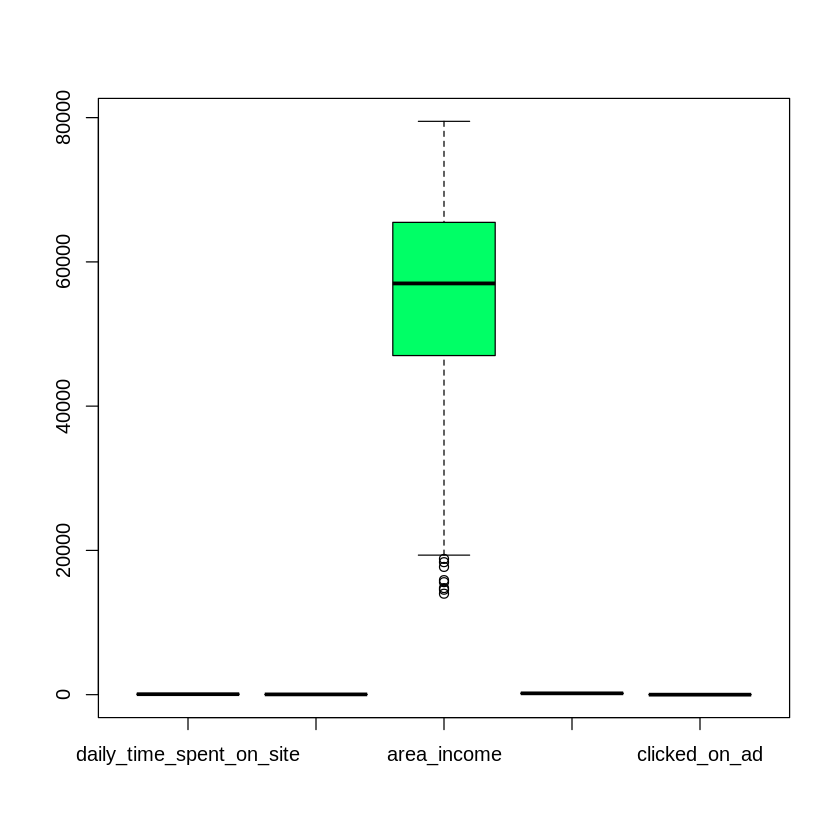

In [ ]:
#Checking for outliers 
boxplot(df, col = rainbow(ncol(df)))

The area income has outliers only 

In [ ]:
# Listing the outliers 
OutVals = boxplot(df, plot=FALSE)$out
OutVals

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

In [ ]:
#Removing outliers 
advert1 <-advert

advert1<- advert1[-which(advert1$area_income %in% OutVals),]
#check the difference 
print(dim(advert))
print(dim(advert1))

[1] 1000   10
[1] 992  10


In [ ]:

#Checking for duplicates in data 

duplicated_rows <- advert1[duplicated(advert1),]
duplicated_rows

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>


No duplicates 

In [ ]:
# Checking the number of missing per column/variable
colSums(is.na(advert1)) 

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                    male                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

No missing data in any column 

#**Exploratory data analysis** 

##**Univariate analysis**

**1. Measures of Central Tendency**

In [ ]:
#Checking the mean 
advert1.dist.mean <- colMeans(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)), na.rm = TRUE)
advert1.dist.mean

daily_time_spent_on_site                      age              area_income 
                65.03979                 35.98286              55312.80720 
    daily_internet_usage 
               179.98504

The mean age of those that visited the blog was 35, and on average the daily time spent was 65 minutes, and the average area income of those that visited the blog was 55312 and had average data usage of 179.98

In [ ]:
# Check for median 

advert1.dist.median <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,median, na.rm = TRUE)
advert1.dist.median

daily_time_spent_on_site                      age              area_income 
                  68.390                   35.000                57228.185 
    daily_internet_usage 
                 183.425

The median age of those that visited the blog was 35, and on median daily time  spent was 68 minutes, and the median area income of those that visited the blog was 57228.185 and had a data usage of 183.425

In [ ]:
#Get the mode 

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}




In [ ]:
attach(advert)
getmode(age);getmode(daily_time_spent_on_site); getmode(area_income);getmode(daily_internet_usage)

[1] 31

[1] 62.26

[1] 61833.9

[1] 167.22

The mode for ages, area income, daily_time_spent on site and daily internet usage was 31 years, 62.26, 61833.9 and 167.22 respectively meaning this were the most frequent characteristics of the users of her blog 

**2. Measures of dispersion** 

In [ ]:
#check the minimum values of every column 
advert.dist.min <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,min, na.rm = TRUE)
advert.dist.min

daily_time_spent_on_site                      age              area_income 
                   32.60                    19.00                 19345.36 
    daily_internet_usage 
                  104.78

The minimum age of those that visit her blog is 19 years and minimum time spent on site is 32 and the minimum area income is 19345.6 and the minimum internet usage is 104.78 

In [ ]:
#check the maximum values of every column 
advert.dist.max <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,max, na.rm = TRUE)
advert.dist.max

daily_time_spent_on_site                      age              area_income 
                   91.43                    61.00                 79484.80 
    daily_internet_usage 
                  269.96

The maximum age of those that visit her blog is 61 years and maximum time spent on site is 91.43 and the maximum area income is 79484.8 and the maximum internet usage is 269.69  

In [ ]:
#check the range of  values of every column 
advert.dist.range <- apply(subset(advert1, select = c(daily_time_spent_on_site, age,	area_income,	daily_internet_usage)),2,range, na.rm = TRUE)
advert.dist.range


daily_time_spent_on_site,age,area_income,daily_internet_usage
32.60,19,19345.36,104.78
91.43,61,79484.80,269.96


In [ ]:
#check the quantiles  values of every column 
advert.dist.quantiles <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,quantile, na.rm = TRUE)
advert.dist.quantiles

,daily_time_spent_on_site,age,area_income,daily_internet_usage
0%,32.600,19,19345.36,104.7800
25%,51.285,29,47332.82,138.6475
50%,68.390,35,57228.18,183.4250
75%,78.585,42,65518.96,218.8425
100%,91.430,61,79484.80,269.9600


In [ ]:
#check the variation of  values of every column 
#The variance is a numerical measure of how the data values is dispersed around the mean.
 
advert.dist.variance <- apply(subset(advert1, select = c(daily_time_spent_on_site, age,	area_income,	daily_internet_usage)),2,var, na.rm = TRUE)
advert.dist.variance

daily_time_spent_on_site                      age              area_income 
            2.528609e+02             7.745379e+01             1.691376e+08 
    daily_internet_usage 
            1.938785e+03

In [ ]:
#check the standard deviation of  values of every column 
#Standard deviation tells you how spread out the data is. It is a measure of how far each observed value is from the mean.

advert.dist.sd <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,sd, na.rm = TRUE)
advert.dist.sd

daily_time_spent_on_site                      age              area_income 
               15.901600                 8.800784             13005.290554 
    daily_internet_usage 
               44.031632

Area income values are highly spread out from the mean 

In [ ]:
#check the skewness every column 
install.packages("moments")
library(moments)
advert.dist.skewness <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,skewness, na.rm = TRUE)
advert.dist.skewness

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



daily_time_spent_on_site                      age              area_income 
             -0.37679250               0.48509707              -0.57508362 
    daily_internet_usage 
             -0.03390524



if the peak is toward the right and the left tail is longer, we say that the distribution is skewed left or negatively skewed.

Area income is moderately negatively skewed 

 Daily time spent, age and daily internet usage is approximately symmetric 



In [ ]:
#check the kurtosis every column 
install.packages("moments")
library(moments)
advert.dist.kurtosis <- apply(subset(advert1, select = c(daily_time_spent_on_site,age,	area_income,	daily_internet_usage)),2,kurtosis, na.rm = TRUE)
advert.dist.kurtosis

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



daily_time_spent_on_site                      age              area_income 
                1.898712                 2.599489                 2.708115 
    daily_internet_usage 
                1.719177


A distribution with kurtosis <3 like for all our variables is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

The reason for this is because the extreme values are less than that of the normal distribution.

**3. Univariate graphical**

A histogram shows the frequency distribution of a quantitative variable. The area of each bar is equal to the frequency of items found in each class.

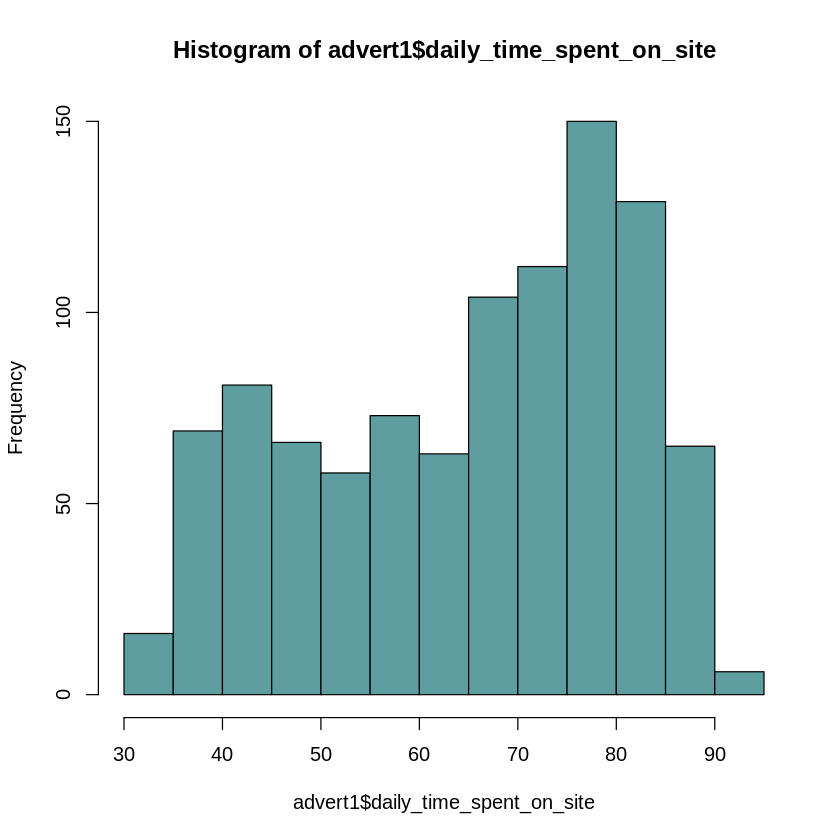

In [ ]:
#see the daily_time_spent_on_site distribution 
hist(advert1$daily_time_spent_on_site, col='cadetblue')

Most people spend around 70-85 daily time on the blog 

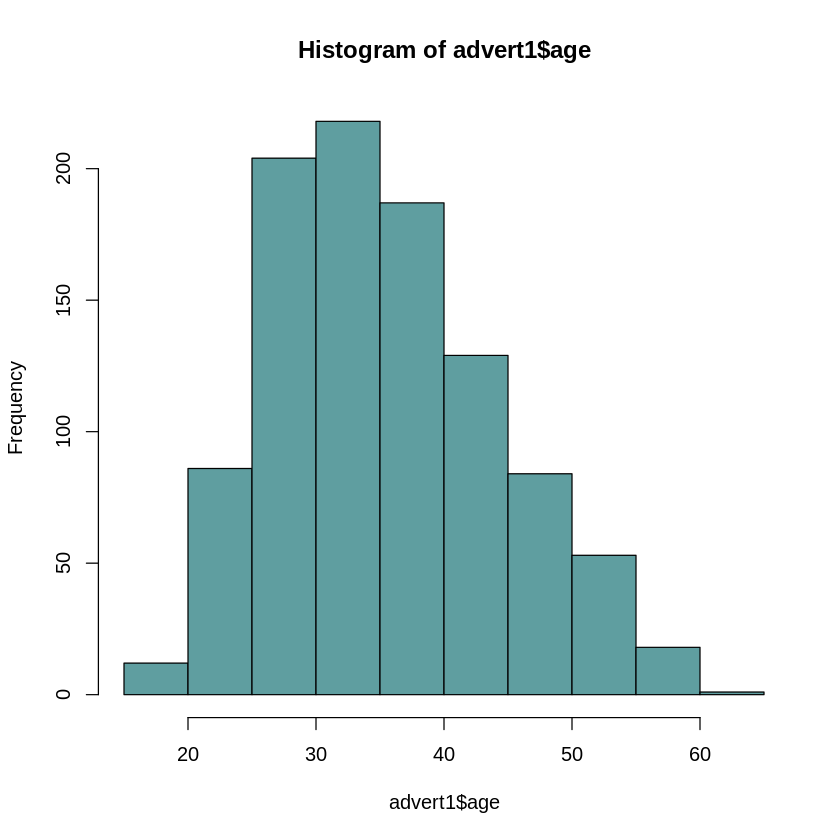

In [ ]:
#See the age distribution 
hist(advert1$age, col='cadetblue')

Most people that spend time on the blog are between 25-35 years 

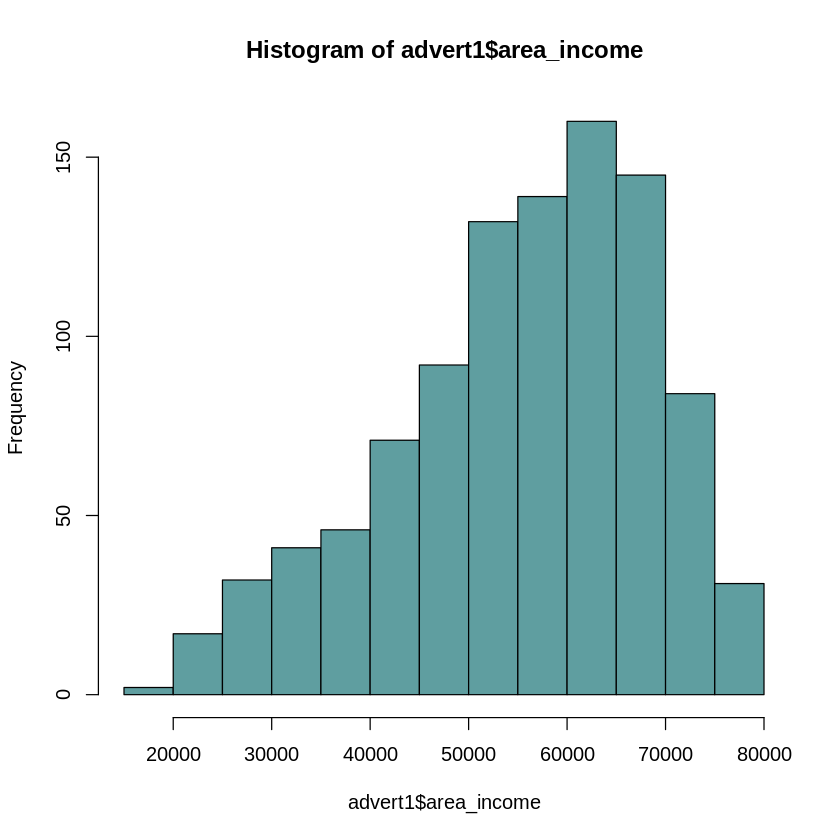

In [ ]:
#See the area_income distribution 
hist(advert1$area_income, col='cadetblue')

Most people that spend time on the blog have an area income of 5000-7000

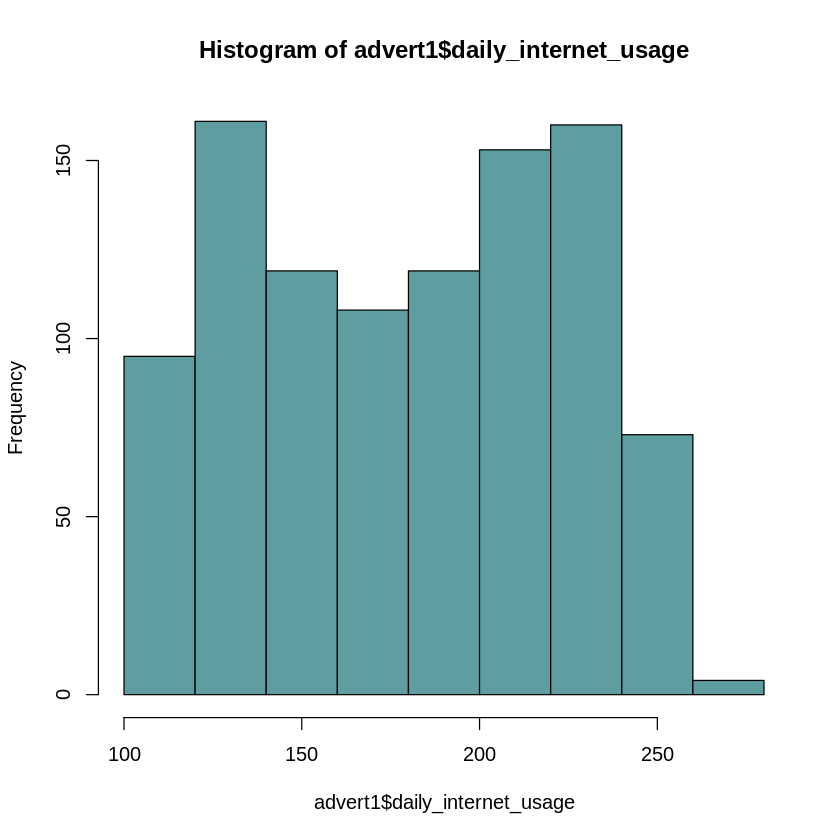

In [ ]:
#See the daily_internet_usage distribution 
hist(advert1$daily_internet_usage, col='cadetblue')

Most daily internet usage in the blog is around 120-140 and 220-240 

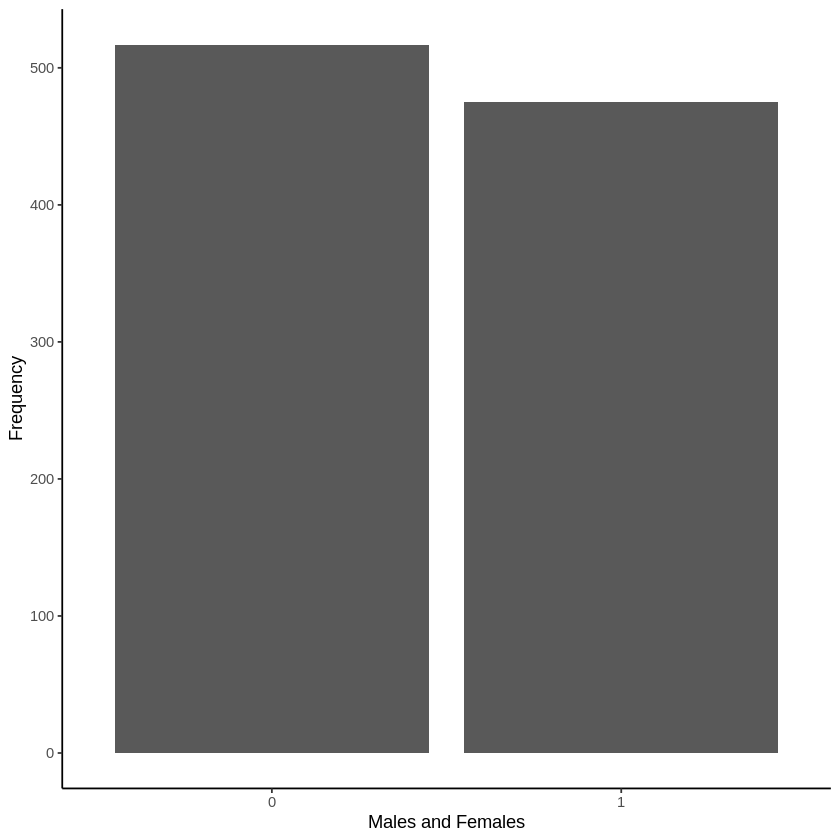

In [ ]:
ggplot(advert1,aes(x=toupper(male)))+geom_bar()+xlab(label = "Males and Females")+ylab(label = "Frequency")+theme_classic()

female is 0 hence most people on her blog are female 

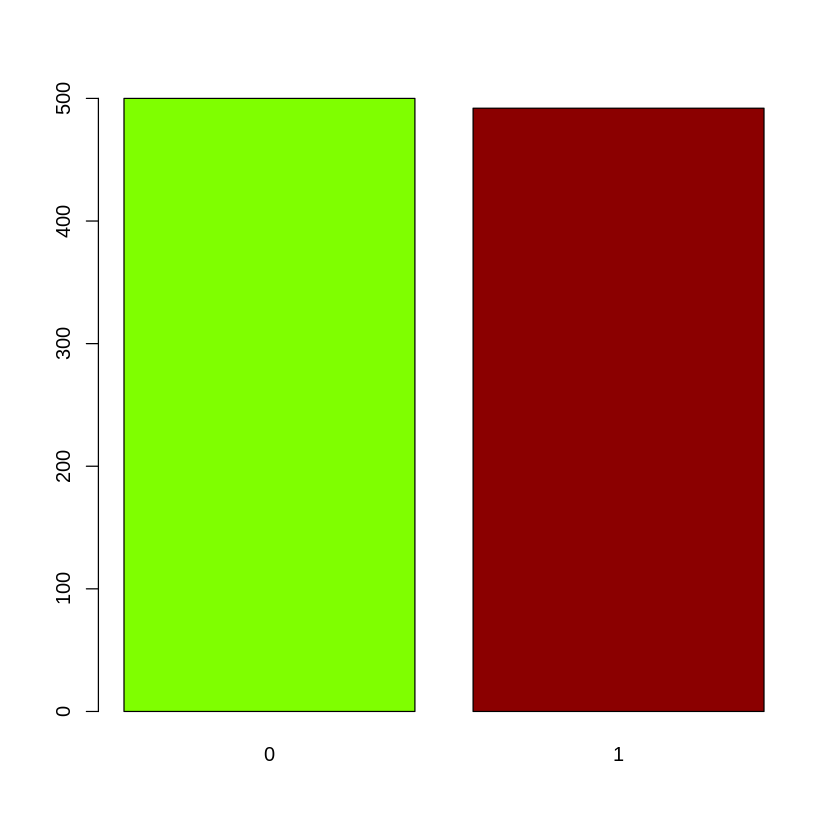

In [ ]:
# Getting specific columns which is clicked on ad
clickad <- advert1$clicked_on_ad

# Applying the table() function will compute the frequency distribution of the male variable
# ---
# 
clicked_ad_frequency <- table(clickad)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(clicked_ad_frequency, col=c("chartreuse", "red4"))

The number of people that click the ad on the blog  are almost equal 

In [ ]:
#Distribution of the countries 
table(advert1$country)
tt = table(advert1$country)
max(tt)


                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  5 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                          Arg

[1] 9

France have the most people that visited the blog 

In [ ]:
#Distribution of cities 
table(advert1$city)


              Adamsbury                Adamside               Adamsstad 
                      1                       1                       1 
               Alanview           Alexanderfurt           Alexanderview 
                      1                       1                       1 
          Alexandrafort              Alexisland              Aliciatown 
                      1                       1                       1 
           Alvaradoport             Alvarezland              Amandafort 
                      1                       1                       1 
            Amandahaven              Amandaland                 Amyfurt 
                      1                       1                       1 
               Amyhaven         Andersonchester            Andersonfurt 
                      1                       1                       1 
            Andersonton           Andrewborough             Andrewmouth 
                      1                       1   

Very few cities had more that one person visiting the site 

In [ ]:
#Distribution of cities 
table(advert1$ad_topic_line)


                      Adaptive 24hour Graphic Interface 
                                                      1 
                         Adaptive asynchronous attitude 
                                                      1 
                 Adaptive context-sensitive application 
                                                      1 
                Adaptive contextually-based methodology 
                                                      1 
                   Adaptive demand-driven knowledgebase 
                                                      1 
                            Adaptive uniform capability 
                                                      1 
                             Advanced 24/7 productivity 
                                                      1 
                      Advanced 5thgeneration capability 
                                                      1 
                       Advanced didactic conglomeration 
                              

##**Bivariate analysis**

In [ ]:
names(advert1)

[1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"

In [ ]:
#Assigning the each column to the  their variable for easier manipulation 

age <- advert1$age

daily_time_spent_on_site <- advert1$daily_time_spent_on_site

area_income <- advert1$area_income

daily_internet_usage <- advert1$daily_internet_usage


**1. Covariance of various variables**

Age and other variables 

In [ ]:
cov(age, daily_time_spent_on_site)

[1] -46.5009

In [ ]:
cov(age, area_income)

[1] -20614.92

In [ ]:
cov(age, daily_internet_usage)

[1] -142.5798

Area income and other variables

In [ ]:
cov( area_income, daily_time_spent_on_site)

[1] 65151.28

In [ ]:
cov( area_income, daily_internet_usage)

[1] 200896.3

Daily internet usage and daily time spent 

In [ ]:
cov( daily_time_spent_on_site, daily_internet_usage)

[1] 363.8961

 Covariance indicates the relationship of two variables whenever one variable changes.
 
  If an increase in one variable results in an increase in the other variable, both variables are said to have a positive covariance. 
  
Area income and daily time spent, area income and daily internet usage and daily internet usage and aily internet usage have positive covariance 

Area income and internet usage have the strongest positive relationship 
 
 Decreases in one variable also cause a decrease in the other. Both variables move together in the same direction when they change.

 Age and the other variables have negative covariance 


 age and area income have the highest negative relationship 

**2.Correlation Coefficient**

In [ ]:
cor(age, daily_time_spent_on_site)

[1] -0.3322762

In [ ]:
cor(age, area_income)

[1] -0.180111

In [ ]:
cor(age, daily_internet_usage)

[1] -0.3679358

In [ ]:
cor( area_income, daily_time_spent_on_site)

[1] 0.3150374

In [ ]:
cor( area_income, daily_internet_usage)

[1] 0.3508222

In [ ]:
cor( daily_time_spent_on_site, daily_internet_usage)

[1] 0.5197228

Age and other variables are weakly negatively linearly related 


While daily time spent on site and daily internet usage has the highest positive linerly relationship 

**3. Correlation matrix**

In [ ]:
install.packages("corrplot") # used to draw correlation matrix 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Plotting a correlation matrix 

corrplot 0.84 loaded



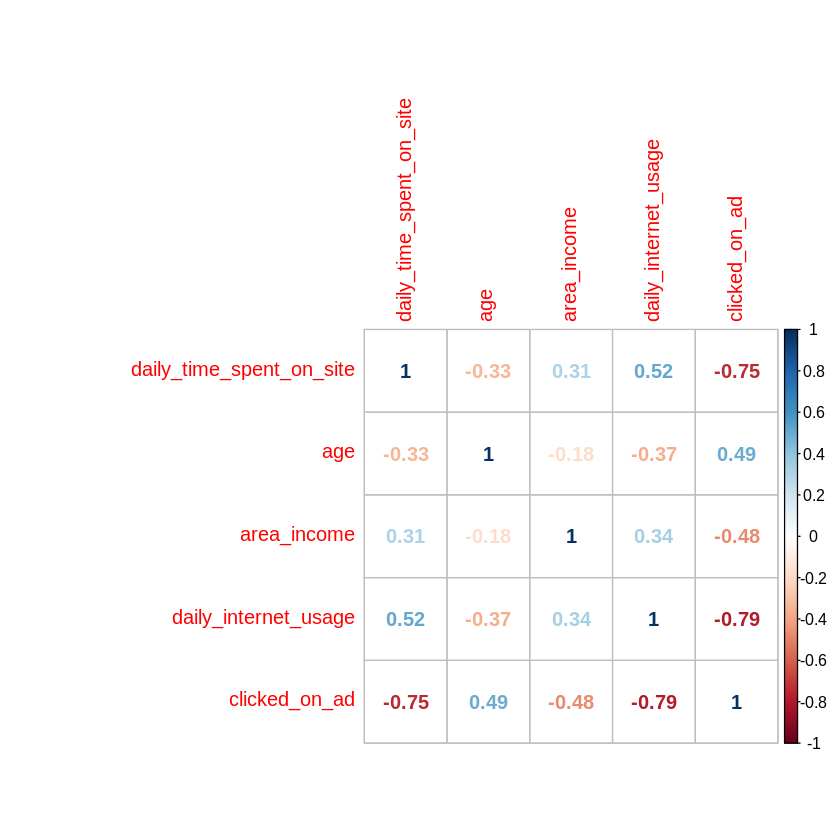

In [ ]:
M<-cor(df) #find the correlation
library(corrplot)
corrplot(M, method="number") #Compute and visualize the correlation co-eeficients 

Those with blue have positive correlation coeefeicient  while those in red have negative correlation coeffecient  

**4. Scatter plot**

Area income and internet usage

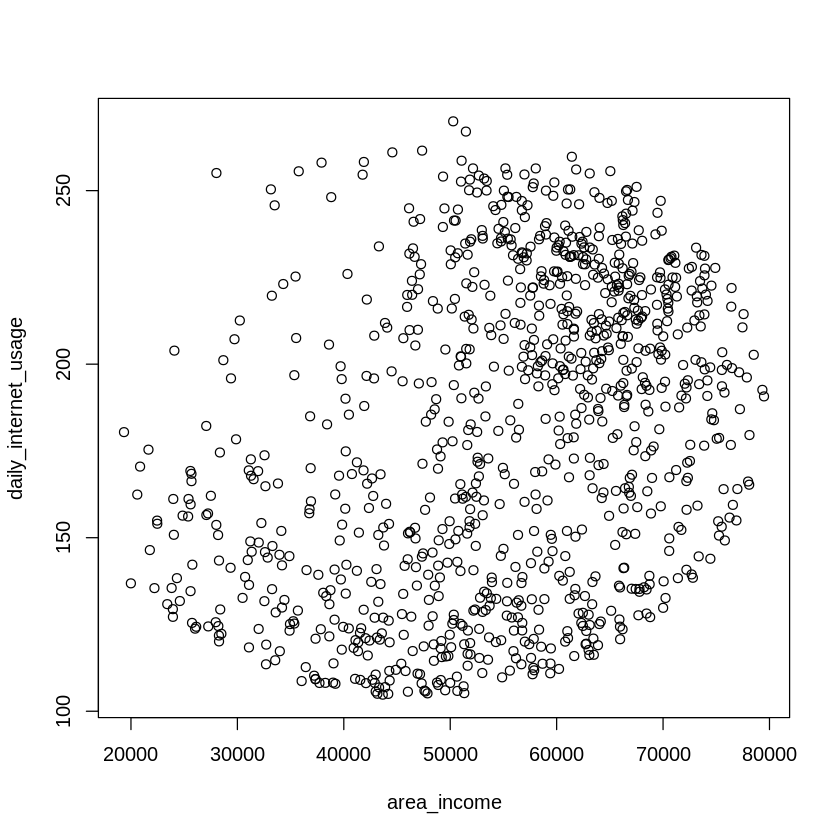

In [ ]:
plot(area_income,daily_internet_usage,  xlab="area_income", ylab="daily_internet_usage")

Age and Internet usage 

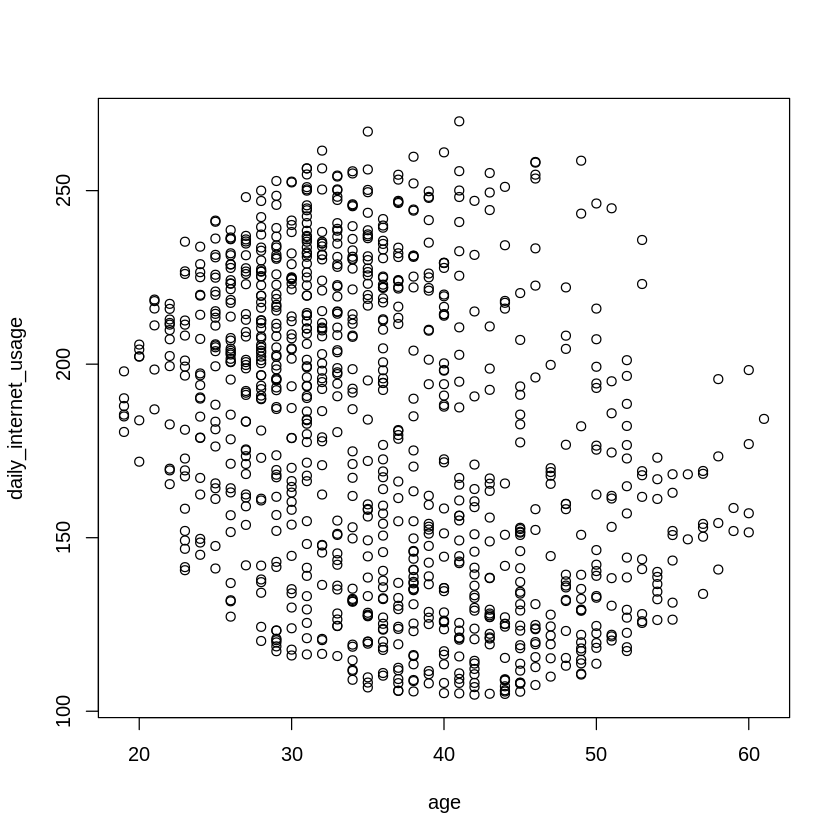

In [ ]:
plot(age,daily_internet_usage,  xlab="age", ylab="daily_internet_usage")

The scatter plots above reveals a weak relationships between area_internet and internet_usage and age and internet_usage 

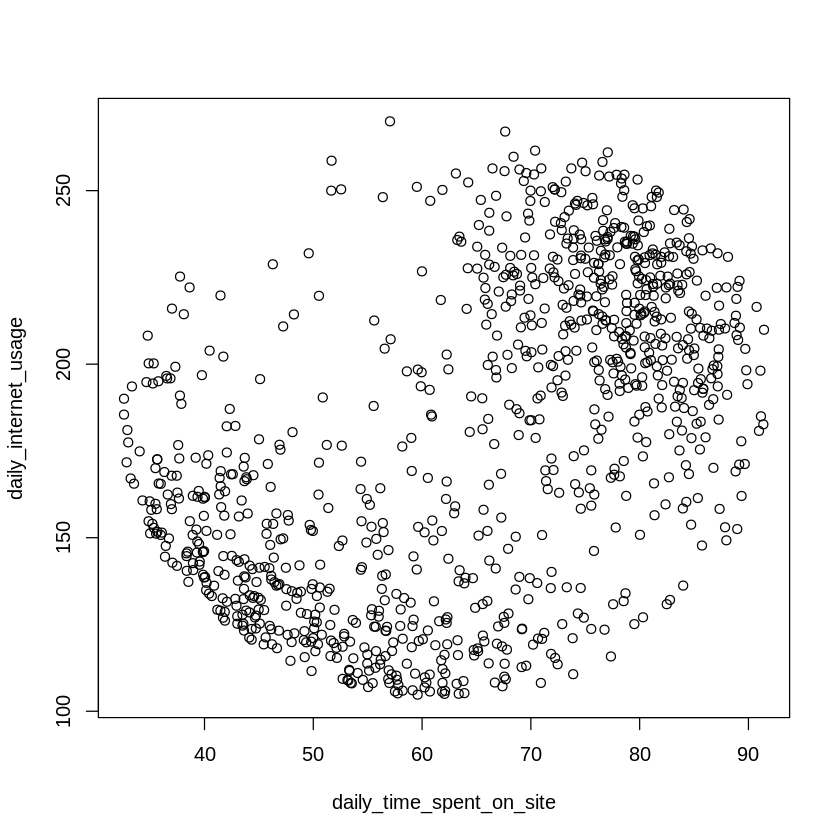

In [ ]:
plot(daily_time_spent_on_site,daily_internet_usage,  xlab="daily_time_spent_on_site", ylab="daily_internet_usage")

The scatter plot above reveals a moderate positive relationship between daily_time-spent and internet_usage and age and internet_usage

#**Modeliing**

In [ ]:
head(advert) #overview of dataset

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


**Installing some packages that will help us** 

In [ ]:
install.packages('caret')
library(caret)
install.packages("kernlab")
library(kernlab)
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Separate the subsets you want 

In [ ]:
advert1.new<- advert1[, c(1, 2, 3, 4,7,10)]
#advert1.class<- advert1[, "clicked_on_ad"]
head(advert1.new)

daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0


**Normalize the data**

In [ ]:
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
df <- as.data.frame(apply(advert1.new,2, normalize))
head(df)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6178820,0.3809524,0.7065004,0.9160310,0,0
2,0.8096209,0.2857143,0.8163776,0.5387456,1,0
3,0.6267211,0.1666667,0.6724469,0.7974331,0,0
4,0.7062723,0.2380952,0.5896433,0.8542802,1,0
5,0.6080231,0.3809524,0.9069694,0.7313234,0,0
6,0.4655788,0.0952381,0.6720415,0.7383460,1,0


In [ ]:
# check the datatypes 
sapply(advert1.new, class)

daily_time_spent_on_site                      age              area_income 
               "numeric"                "numeric"                "numeric" 
    daily_internet_usage                     male            clicked_on_ad 
               "numeric"                "numeric"                "numeric"

**We’ll be using the training set specifically for our model building and the testing set for evaluating the model:**

In [ ]:
intrain <- createDataPartition(y = advert1.new$clicked_on_ad, p= 0.7, list = FALSE)
training <- df[intrain,]
testing <- df[-intrain,]

In [ ]:
dim(training);   #Seeing the dimensions of the test and training
dim(testing);

[1] 695   6

[1] 297   6

**Naives bayes** 

Separate the dependant and independent variables 

In [ ]:
x = training[,1:5]
y = training$clicked_on_ad

In [ ]:
install.packages("klaR")
library(klaR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10)) # Building a naives bayes model 

In [ ]:
model # Summary of model

Naive Bayes 

695 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 626, 626, 626, 626, 626, 625, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.9610737  0.9221024
   TRUE      0.9654422  0.9308280

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

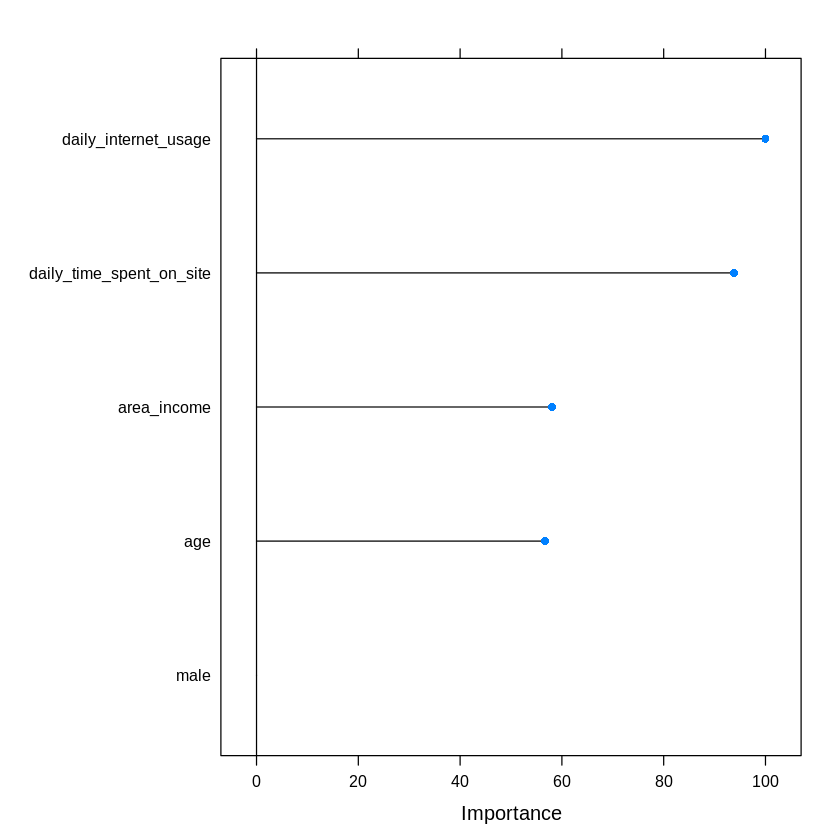

In [ ]:
#Plot Variables performance
X <- varImp(model)
plot(X)

In [ ]:
test_pred1 <- predict(model, newdata = testing) #Predicting 
test_pred1

[1] 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0
 [38] 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 [75] 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1
[112] 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0
[149] 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0
[186] 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
[223] 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
[260] 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1
[297] 1
Levels: 0 1

In [ ]:
confusionMatrix(table(test_pred1, testing$clicked_on_ad)) #Getting an accuracy 

Confusion Matrix and Statistics

          
test_pred1   0   1
         0 145   4
         1   3 145
                                         
               Accuracy : 0.9764         
                 95% CI : (0.952, 0.9905)
    No Information Rate : 0.5017         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9529         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9797         
            Specificity : 0.9732         
         Pos Pred Value : 0.9732         
         Neg Pred Value : 0.9797         
             Prevalence : 0.4983         
         Detection Rate : 0.4882         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.9764         
                                         
       'Positive' Class : 0              
                                         

**Let’s evaluate again using 5 different algorithms:**

* Linear Discriminant Analysis (LDA)
* Classification and Regression Trees (CART).
* k-Nearest Neighbors (kNN).
* Support Vector Machines (SVM) with a linear kernel.
* Random Forest (RF)

In [ ]:
training[["clicked_on_ad"]] = factor(training[["clicked_on_ad"]]) # this should be a categorical variable. To convert clicked_on_ad to categorical variables, we need to factorize them

In [ ]:
# Run algorithms using 10-fold cross validation
trctrl <- trainControl(method = "repeatedcv", number = 10,  repeats = 3)

In [ ]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(clicked_on_ad ~., data=training, method="lda", metric=metric, trControl=trctrl)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(clicked_on_ad ~., data=training, method="rpart", metric=metric, trControl=trctrl)
# kNN
set.seed(7)
fit.knn <- train(clicked_on_ad ~., data=training, method="knn", metric=metric, trControl=trctrl)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(clicked_on_ad ~., data=training, method="svmLinear", metric=metric, trControl=trctrl)
# Random Forest
set.seed(7)
fit.rf <- train(clicked_on_ad ~., data=training, method="rf", metric=metric, trControl=trctrl)

In [ ]:

# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.9130435 0.9420290 0.9571429 0.9577226 0.9714286 1.0000000    0
cart 0.8840580 0.9275362 0.9420290 0.9347682 0.9531056 0.9855072    0
knn  0.9142857 0.9428571 0.9571429 0.9596825 0.9710145 1.0000000    0
svm  0.9142857 0.9565217 0.9640787 0.9659489 0.9855072 1.0000000    0
rf   0.9275362 0.9420290 0.9568323 0.9572945 0.9714286 0.9859155    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.8256108 0.8838384 0.9141453 0.9153099 0.9428571 1.0000000    0
cart 0.7682620 0.8551029 0.8839847 0.8695269 0.9061850 0.9710206    0
knn  0.8275862 0.8857143 0.9141453 0.9192673 0.9420046 1.0000000    0
svm  0.8281506 0.9129154 0.9281269 0.9318370 0.9709962 1.0000000    0
rf   0.8547368 0.8840336 0.9136036 0.9145397 0.9428455 0.9718366    0


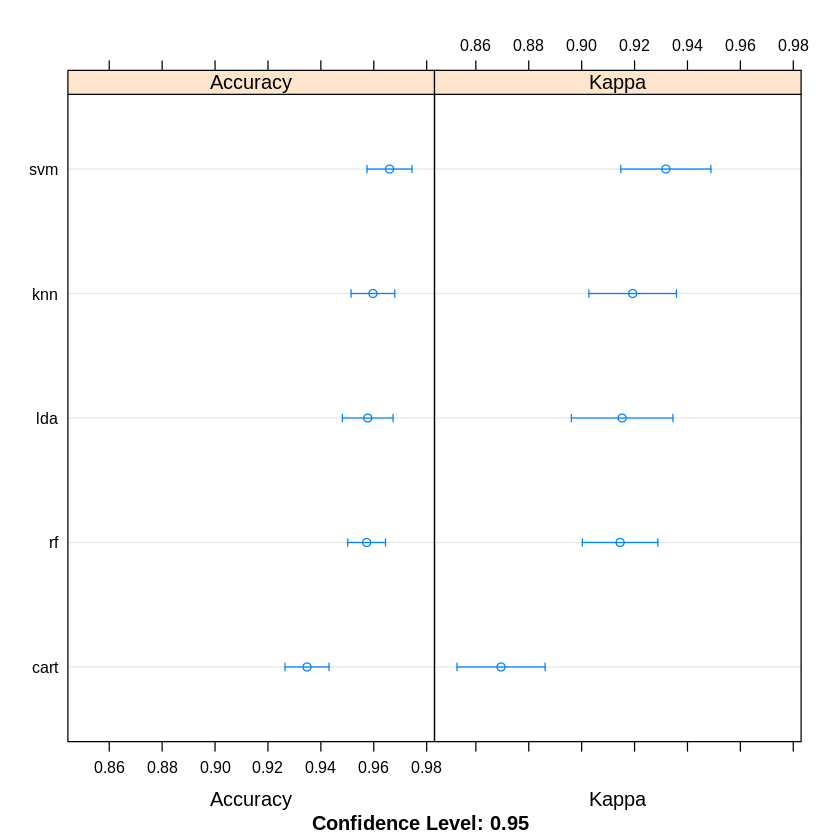

In [ ]:
# compare accuracy of models
dotplot(results)

**summarize best model** 

In [ ]:
fit.svm # Support vector machine summary

Support Vector Machines with Linear Kernel 

695 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 626, 626, 625, 626, 624, 625, ... 
Resampling results:

  Accuracy   Kappa   
  0.9659489  0.931837

Tuning parameter 'C' was held constant at a value of 1

In [ ]:
test_pred <- predict(fit.svm, newdata = testing) #predicting 
test_pred

[1] 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0
 [38] 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 [75] 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1
[112] 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0
[149] 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0
[186] 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
[223] 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
[260] 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1
[297] 1
Levels: 0 1

**Now checking for our accuracy of our model by using a confusion matrix**

In [ ]:
confusionMatrix(table(test_pred, testing$clicked_on_ad))

Confusion Matrix and Statistics

         
test_pred   0   1
        0 146   5
        1   2 144
                                         
               Accuracy : 0.9764         
                 95% CI : (0.952, 0.9905)
    No Information Rate : 0.5017         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9529         
                                         
 Mcnemar's Test P-Value : 0.4497         
                                         
            Sensitivity : 0.9865         
            Specificity : 0.9664         
         Pos Pred Value : 0.9669         
         Neg Pred Value : 0.9863         
             Prevalence : 0.4983         
         Detection Rate : 0.4916         
   Detection Prevalence : 0.5084         
      Balanced Accuracy : 0.9765         
                                         
       'Positive' Class : 0              
                                         

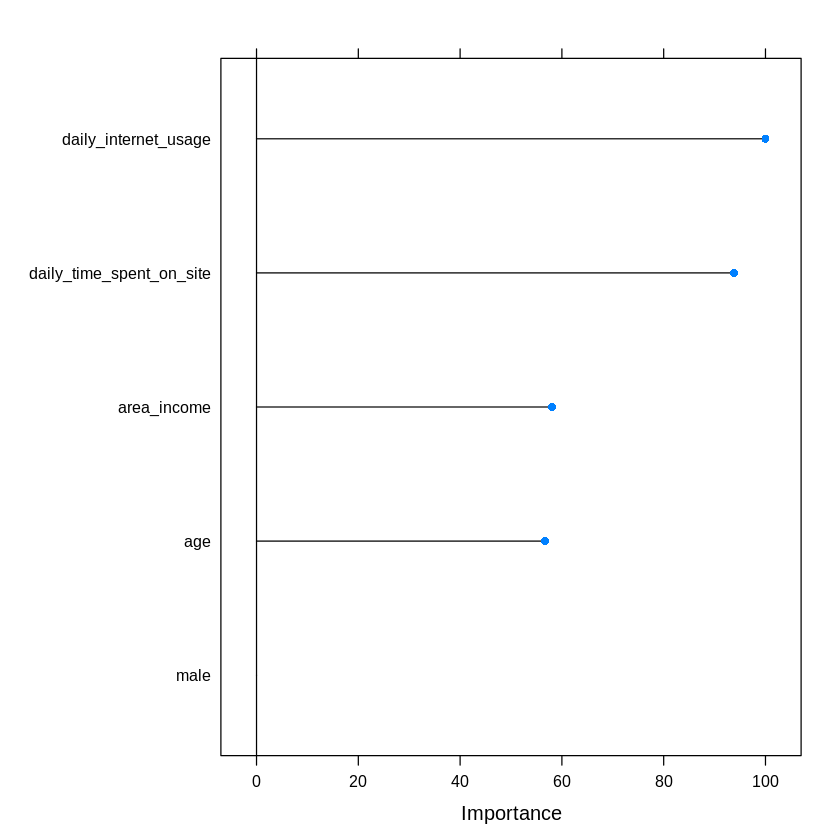

In [ ]:
#Plot Variables performance
X <- varImp(fit.svm)
plot(X)

Hence at a 97.64% accuracy naives bayes and svm can be used to classify people who will click on an ad. 
The variables that are used to predict in order of their importance are daily_internet_usage, daily_time_spent, average income and age 

#**Implementing the solution** 

In [ ]:
#Create a dataframe that selects those that clicked an ad
yes <-  advert1 %>% filter(advert1$clicked_on_ad  == 1);   # Select those  clicked on ad 

In [ ]:
#summary of those that clicked the ad 
summary(yes)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :19345   Min.   :104.8       
 1st Qu.:42.58            1st Qu.:34.00   1st Qu.:39697   1st Qu.:123.3       
 Median :51.27            Median :40.00   Median :49867   Median :138.5       
 Mean   :53.03            Mean   :40.35   Mean   :49141   Mean   :144.9       
 3rd Qu.:61.92            3rd Qu.:47.00   3rd Qu.:59403   3rd Qu.:160.4       
 Max.   :91.37            Max.   :61.00   Max.   :78521   Max.   :270.0       
 ad_topic_line          city                male          country         
 Length:492         Length:492         Min.   :0.0000   Length:492        
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.4573                     
                                       3rd Qu.:1.0000                   

The mean years of those that clicked the ad was  40years 

The mean daily time of those that clicked the ad spent was 53 

The area income mean of those that clicked the ad was 49141

The daily internet usage mean was 144.9 


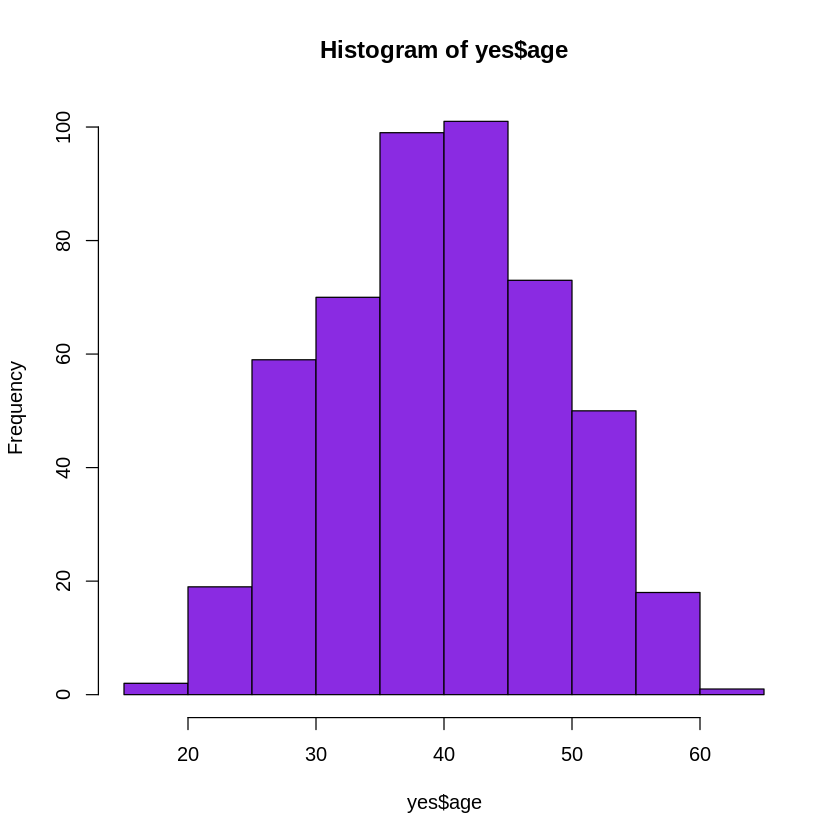

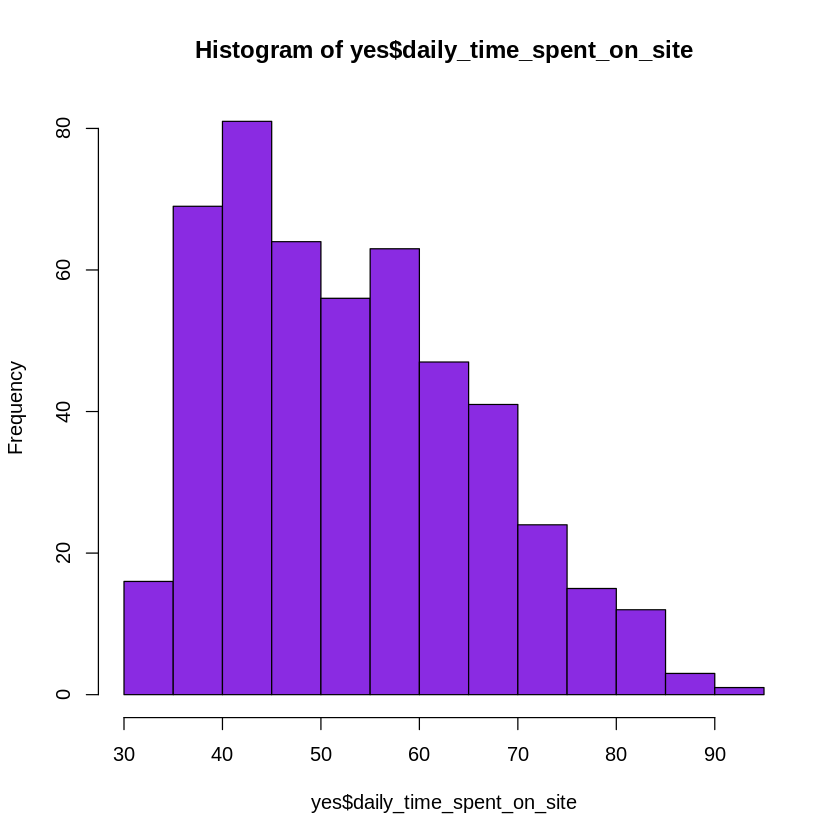

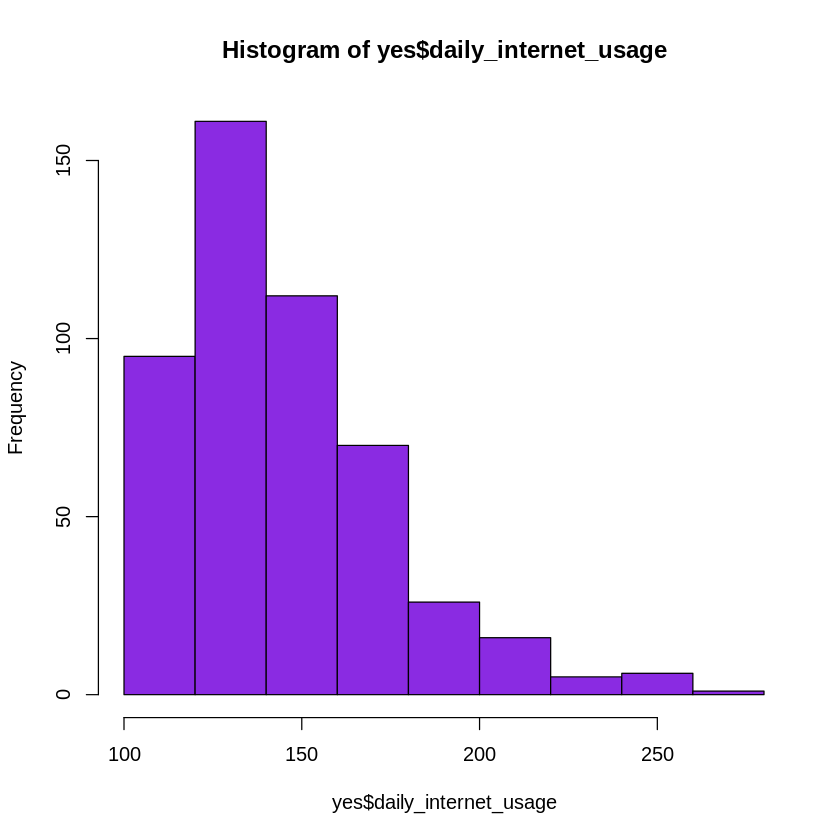

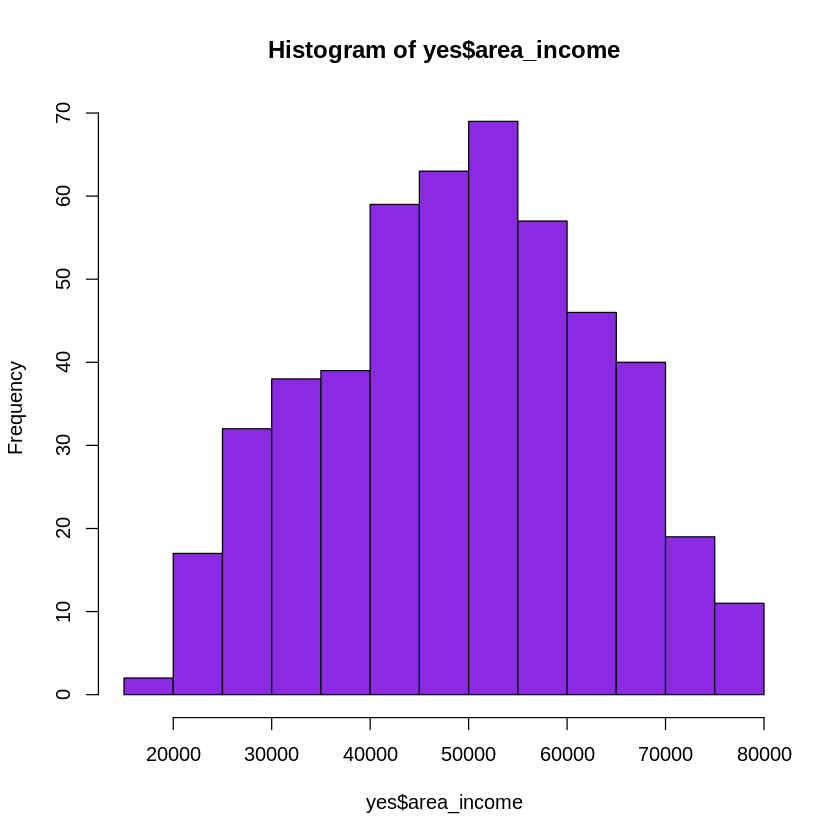

In [ ]:
#See the age distribution 
hist(yes$age, col='blueviolet')
#See the daily_time_spent_on_site distribution 
hist(yes$daily_time_spent_on_site, col='blueviolet')
#See the daily_internet_usage distribution 
hist(yes$daily_internet_usage, col='blueviolet')
#See the area_incomedistribution 
hist(yes$area_income, col='blueviolet')

Those that clicked the ad most 

* were around the ages of 30-40 

* daily spent time on site was 35-50, 
 
* have a daily internet usage of 100-150 
 
* had an area income 40000-55000

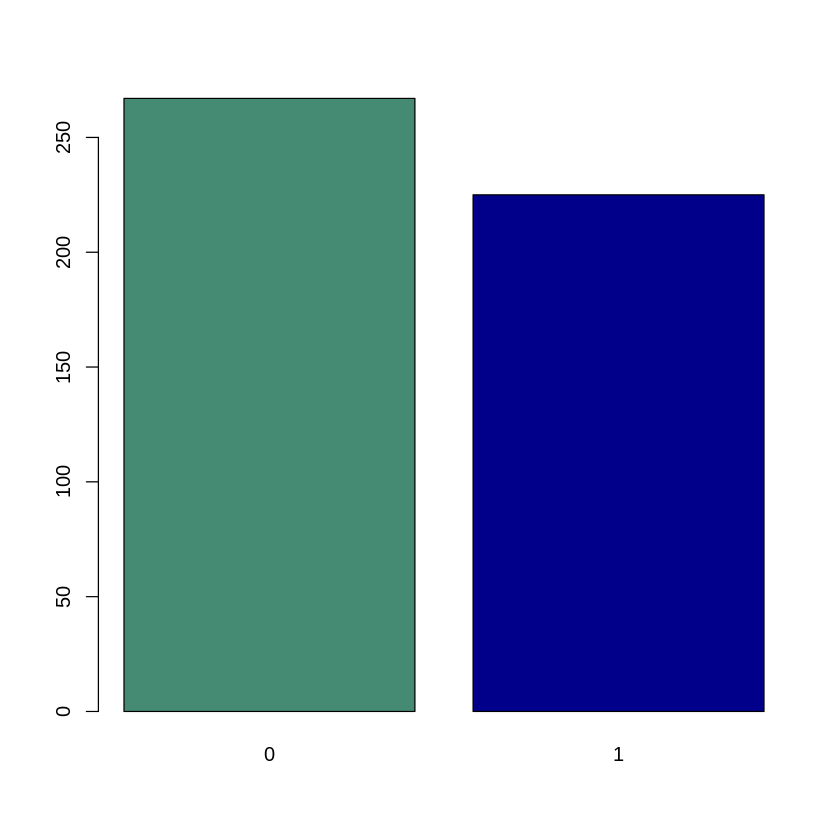

In [ ]:
# Getting specific column - male 
male1 <- yes$male

# Applying the table() function will compute the frequency distribution of the male variable
# ---
# 
males_frequency1 <- table(male1)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(males_frequency1, col=c("aquamarine4", "blue4"))

More females clicked on the ad than males  Female=0 

In [ ]:
#Distribution of the countries 

yy= table(yes$country)

print(max(yy))
yy


[1] 7



                                        Afghanistan 
                                                  5 
                                            Albania 
                                                  4 
                                            Algeria 
                                                  2 
                                     American Samoa 
                                                  3 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  1 
                                           Anguilla 
                                                  3 
       Antarctica (the territory South of 60 deg S) 
                                                  2 
                                Antigua and Barbuda 
                                                  4 
                                          Arg

Turkey has the highest number of those people that clicked the ad 

In [ ]:
ss= table(yes$city)

print(max(ss))
ss

[1] 2



              Adamsbury                Adamside           Alexanderfurt 
                      1                       1                       1 
          Alexanderview              Aliciatown            Alvaradoport 
                      1                       1                       1 
            Alvarezland              Amandafort             Amandahaven 
                      1                       1                       1 
        Andersonchester            Andersonfurt           Andrewborough 
                      1                       1                       1 
             Bernardton               Bethburgh            Blairborough 
                      1                       1                       1 
            Blevinstown               Boyerberg            Bradleyburgh 
                      1                       1                       1 
            Bradleyside               Bradyfurt              Brandiland 
                      1                       1   

Lisamouth, Michelleside,  Millerbury, Robertfurt, South Lisa, West Shannon and Williamsport cities had the most people that viewed the ad 



> **Pearson correlation and coefficient tests** 



In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
library("ggpubr")

`geom_smooth()` using formula 'y ~ x'



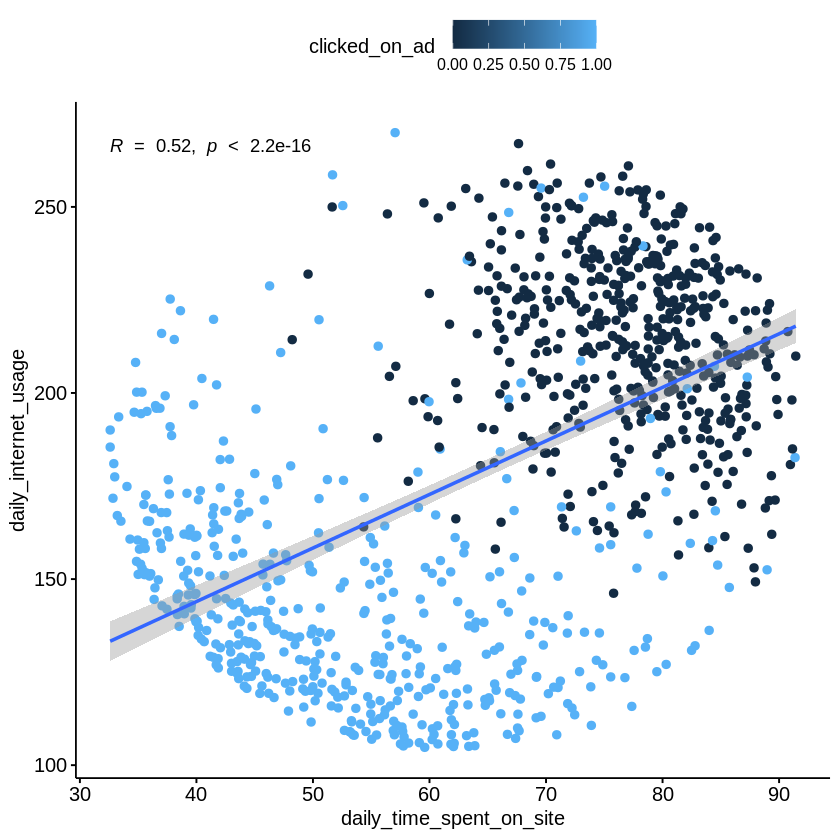

In [ ]:
ggscatter(advert1, x = "daily_time_spent_on_site", y = "daily_internet_usage", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "daily_time_spent_on_site", ylab = "daily_internet_usage",  color = "clicked_on_ad")

In [ ]:
res <- cor.test(advert1$daily_internet_usage, advert1$daily_time_spent_on_site, 
                    method = "pearson")
res # Testing the significance of the Pearson correlation co-efficients of daily internet usage and time_spent_on_site 


	Pearson's product-moment correlation

data:  advert1$daily_internet_usage and advert1$daily_time_spent_on_site
t = 19.141, df = 990, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4727739 0.5637294
sample estimates:
      cor 
0.5197228 


The p-value of the test is 2.2e-16, which is less than the significance level alpha = 0.05. We can conclude that daily_internet_usage and daily_time_spent_on_site are significantly correlated with a correlation coefficient of 0.5197228 and p-value of 2.2e-16.



> **Individuals  most likely to click on her ads**


* are around the ages of 30-40 

* daily time on site is 35-50, 
 
* has a daily internet usage of 100-150 
 
* has an area income of 40000-55000

* has an average daily internet time spent of 53 

* has an average daily internet usage of 144.9 




> **There is a positive relationship between daily_internet_usage and daily_spent_time**


Most people who spend the lowest to moderate time on site and have the highest probability of clicking an ad 




#**Challenging the Solution**

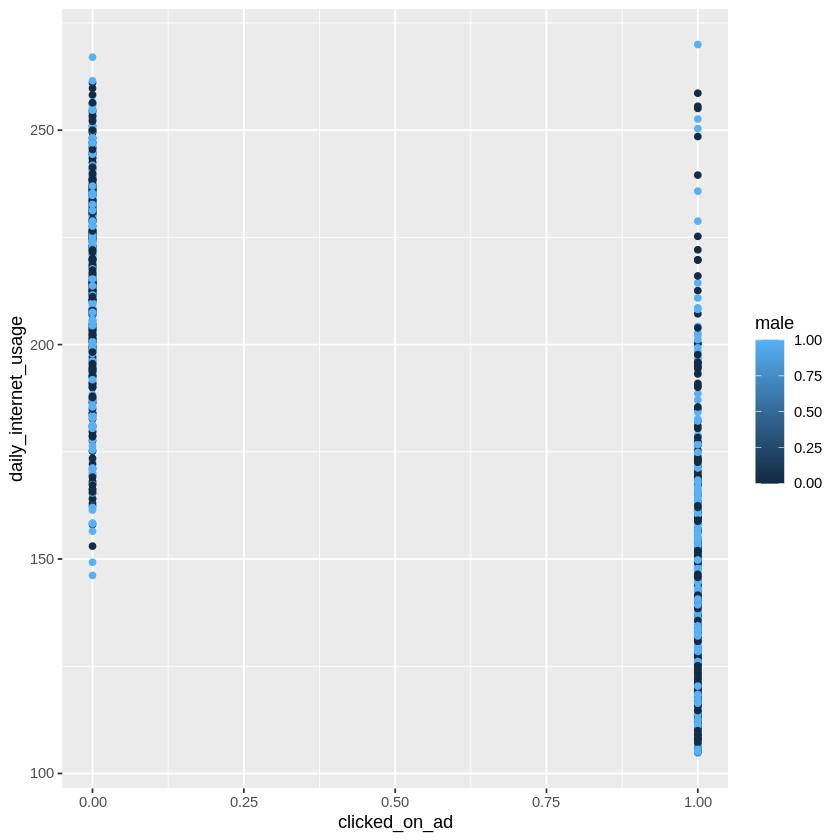

In [ ]:
#Checking how people clicked the ad depending on their daily internet usage while showing their gender
ggplot(data = advert1) + 
  geom_point(mapping = aes(x = clicked_on_ad, y = daily_internet_usage, color = male))

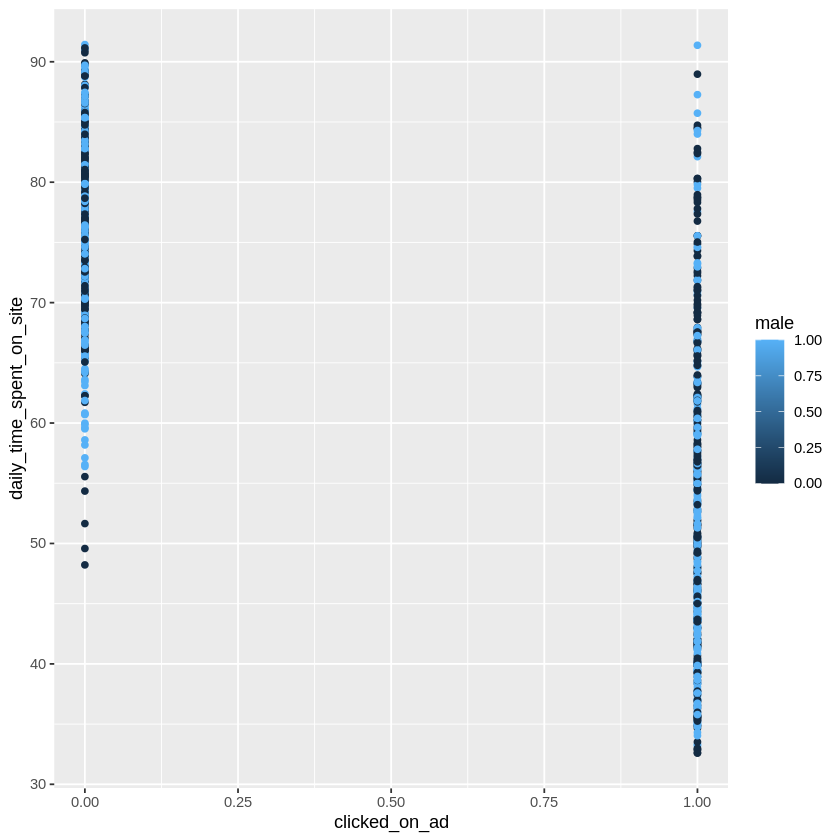

In [ ]:
#Checking how people clicked the ad depending on their daily_time_spent_on_site while showing their gender
ggplot(data = advert1) + 
  geom_point(mapping = aes(x = clicked_on_ad, y = daily_time_spent_on_site, color = male))



> Use classifier models such as GradientBoostingClassifier, DecisionTreeClassifier, XGBClassifier, and LogisticRegression to best predict those that clicked on the ad



#**Follow up Questions** 

## a) Did we have the right question?



yes, the reasearch question was clear and specific.

## b) Did we have the right data?

Yes, the data was relevant to the project. The dataset was also large enough for us to draw some answers.

## c) Do we need other data to answer the research question?

Not necessarily.